# Overview 



This notebook is an example R script on how to prepare the input data prior to building a base GRN.
Here, we use Cicero to extract the cis-regulatory connections between scATAC-seq peaks.



### Notebook file
This notebook is available on CellOracle’s GitHub page as this jupyter notebook (with R kernel) or an R notebook. The notebooks are identical. Please use whichever one you prefer.

- Jupyter notebook with R kernel: https://github.com/morris-lab/CellOracle/blob/master/docs/notebooks/01_ATAC-seq_data_processing/option1_scATAC-seq_data_analysis_with_cicero/01_atacdata_analysis_with_cicero_and_monocle3.ipynb
- R notebook: https://github.com/morris-lab/CellOracle/blob/master/docs/notebooks/01_ATAC-seq_data_processing/option1_scATAC-seq_data_analysis_with_cicero/01_atacdata_analysis_with_cicero_and_monocle3.Rmd



### CAUTION: 

- This notebook is intended to **demonstrate data preprocessing steps prior to starting a CellOracle analysis**. CellOracle is NOT used in this notebook, and this notebook is not the CellOracle analysis.

- Here, we will use `Cicero` to process scATAC-seq data. If you are new to this packages, pelase review the Cicero's documentation to learn the basic process of Cicero in advance.  

 - `Cicero` documentation: https://cole-trapnell-lab.github.io/cicero-release/docs_m3/ 

- The R library, cicero and monocle3 is NOT the part of celloracle package. **Please install them yourself if you use this notebook**.

# 0. Import library

In [ ]:
# To install R extension in Jupyter follow link below

# https://saturncloud.io/blog/how-to-use-jupyter-r-kernel-with-visual-studio-code/

# Also Linux does not suppport the latest R release 4.3 which is needed to run cicero (as of Feb 2024) you should use windows or mac

In [2]:
R.Version()

$platform
[1] "x86_64-w64-mingw32"

$arch
[1] "x86_64"

$os
[1] "mingw32"

$crt
[1] "ucrt"

$system
[1] "x86_64, mingw32"

$status
[1] ""

$major
[1] "4"

$minor
[1] "3.2"

$year
[1] "2023"

$month
[1] "10"

$day
[1] "31"

$`svn rev`
[1] "85441"

$language
[1] "R"

$version.string
[1] "R version 4.3.2 (2023-10-31 ucrt)"

$nickname
[1] "Eye Holes"

In [2]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install(version = "3.18")

Warning message:
"package 'BiocManager' was built under R version 4.2.3"
Bioconductor version '3.16' is out-of-date; the current release version '3.18'
  is available with R version '4.3'; see https://bioconductor.org/install



ERROR: Error: Bioconductor version '3.18' requires R version '4.3'; use `version = '3.16'`
  with R version 4.2; see https://bioconductor.org/install


In [5]:
# Install cicero and monocle3

if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("cicero")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cloud.r-project.org



Bioconductor version 3.14 (BiocManager 1.30.22), R 4.1.2 (2021-11-01)

Installing package(s) 'cicero'

Warning message:
“dependency ‘qlcMatrix’ is not available”
also installing the dependency ‘monocle’


Warning message in install.packages(...):
“installation of package ‘monocle’ had non-zero exit status”
Warning message in install.packages(...):
“installation of package ‘cicero’ had non-zero exit status”
Installation paths not writeable, unable to update packages
  path: /usr/lib/R/library
  packages:
    boot, class, cluster, codetools, foreign, KernSmooth, lattice, MASS, mgcv,
    nlme, nnet, rpart, spatial, survival
  path: /usr/lib/R/site-library
  packages:
    acepack, askpass, bench, BH, bit, blob, brio, broom, cachem, callr, caret,
    cba, checkmate, chron, classInt, cli, colorspace, commonmark, conquer,
    covr, cpp11, crayon, crosstalk, curl, CVST, data.table, DBItest, dbplyr,
    ddalpha, decor, deldir, DEoptimR, desc, digest, dimRed, dplyr, DT, e1071,
    earth, evaluat

In [7]:
library(cicero)
library(monocle3)

Loading required package: monocle3

Loading required package: Biobase

Loading required package: BiocGenerics




Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: 'matrixStats'


The fol

# 1. Download data

This tutorial uses fetal brain scATAC-seq data from a 10x Genomics database. If you’re using your own scATAC-seq data, you will not need to download this dataset.

You can download the demo file with the following command.

**Note: If the file download fails, please manually download and unzip the data.**
http://cf.10xgenomics.com/samples/cell-atac/1.1.0/atac_v1_E18_brain_fresh_5k/atac_v1_E18_brain_fresh_5k_filtered_peak_bc_matrix.tar.gz

In [1]:
getwd()

[1] "s:/LAB_RB/LAB/Alvaro/Bioinformatics/Analysis/scAGM_Embryos/Notebooks/CellOracle/scATAC_data"

In [3]:
# Create folder to store data
dir.create("data")

# Download demo dataset from 10x genomics 
download.file(url = "http://cf.10xgenomics.com/samples/cell-atac/1.1.0/atac_v1_E18_brain_fresh_5k/atac_v1_E18_brain_fresh_5k_filtered_peak_bc_matrix.tar.gz",
              destfile = "data/matrix.tar.gz")
# Unzip data
system("tar -xvf data/matrix.tar.gz -C data")

In [4]:
# You can substitute the data path below to your scATAC-seq data.
data_folder <- "data/filtered_peak_bc_matrix"

# Create a folder to save results
output_folder <- "cicero_output"
dir.create(output_folder)

# 2. Load data and make Cell Data Set (CDS) object 
## 2.1. Process data to make CDS object

In [5]:
# Read in matrix data using the Matrix package
indata <- Matrix::readMM(paste0(data_folder, "/matrix.mtx")) 
# Binarize the matrix
indata@x[indata@x > 0] <- 1

# Format cell info
cellinfo <- read.table(paste0(data_folder, "/barcodes.tsv"))
row.names(cellinfo) <- cellinfo$V1
names(cellinfo) <- "cells"

# Format peak info
peakinfo <- read.table(paste0(data_folder, "/peaks.bed"))
names(peakinfo) <- c("chr", "bp1", "bp2")
peakinfo$site_name <- paste(peakinfo$chr, peakinfo$bp1, peakinfo$bp2, sep="_")
row.names(peakinfo) <- peakinfo$site_name

row.names(indata) <- row.names(peakinfo)
colnames(indata) <- row.names(cellinfo)

# Make CDS
input_cds <-  suppressWarnings(new_cell_data_set(indata,
cell_metadata = cellinfo,
gene_metadata = peakinfo))

input_cds <- monocle3::detect_genes(input_cds)

#Ensure there are no peaks included with zero reads
input_cds <- input_cds[Matrix::rowSums(exprs(input_cds)) != 0,] 

## 2.1.a Process Zhu et al data to make CDS object

In [8]:
getwd()

[1] "s:/LAB_RB/LAB/Alvaro/Bioinformatics/Analysis/scAGM_Embryos/Notebooks/CellOracle/scATAC_data"

In [3]:
setwd("../../../celloracle/ATAC_Zhu")

# data_folder <- "../../../celloracle/ATAC_Zhu"



In [4]:
getwd()

[1] "s:/LAB_RB/LAB/Alvaro/Bioinformatics/Analysis/scAGM_Embryos/celloracle/ATAC_Zhu"

In [5]:
# Format peak info
peakinfo <- read.csv("GSM4067208_peak_annotation.csv")
peakinfo <- peakinfo[ ,c("seqnames", "start", "end")]

names(peakinfo) <- c("chr", "bp1", "bp2")
peakinfo$site_name <- paste(peakinfo$chr, peakinfo$bp1, peakinfo$bp2, sep="_")
row.names(peakinfo) <- peakinfo$site_name

peakinfo


,chr,bp1,bp2,site_name
,<chr>,<int>,<int>,<chr>
chr1_10007346_10007524,chr1,10007346,10007524,chr1_10007346_10007524
chr1_10008736_10009547,chr1,10008736,10009547,chr1_10008736_10009547
chr1_100180128_100180379,chr1,100180128,100180379,chr1_100180128_100180379
chr1_100207398_100208277,chr1,100207398,100208277,chr1_100207398_100208277
chr1_100211424_100211604,chr1,100211424,100211604,chr1_100211424_100211604
chr1_100231049_100232201,chr1,100231049,100232201,chr1_100231049_100232201
chr1_10037504_10038608,chr1,10037504,10038608,chr1_10037504_10038608
chr1_10038989_10040276,chr1,10038989,10040276,chr1_10038989_10040276
chr1_10056441_10056935,chr1,10056441,10056935,chr1_10056441_10056935


In [8]:
# Read in matrix data using the Matrix package
indata <- Matrix::readMM("GSM4067208_peak_by_cell_fragment_matrix.txt") 
# Binarize the matrix
indata@x[indata@x > 0] <- 1

# Format cell info
cellinfo <- read.csv("GSE137115_cell_annotation.csv", header = T)

cellinfo <- cellinfo["X"]
names(cellinfo) <- "cells"

# Format peak info
peakinfo <- read.csv("GSM4067208_peak_annotation.csv")
peakinfo <- peakinfo[ ,c("seqnames", "start", "end")]
names(peakinfo) <- c("chr", "bp1", "bp2")
peakinfo$site_name <- paste(peakinfo$chr, peakinfo$bp1, peakinfo$bp2, sep="_")
row.names(peakinfo) <- peakinfo$site_name

row.names(indata) <- row.names(peakinfo)
colnames(indata) <- row.names(cellinfo)

# Make CDS
input_cds <-  suppressWarnings(new_cell_data_set(indata,
cell_metadata = cellinfo,
gene_metadata = peakinfo))

input_cds <- monocle3::detect_genes(input_cds)

#Ensure there are no peaks included with zero reads
input_cds <- input_cds[Matrix::rowSums(exprs(input_cds)) != 0,] 

'as(<dgTMatrix>, "dgCMatrix")' is deprecated.
Use 'as(., "CsparseMatrix")' instead.
See help("Deprecated") and help("Matrix-deprecated").



# 3. Qauality check and Filtering

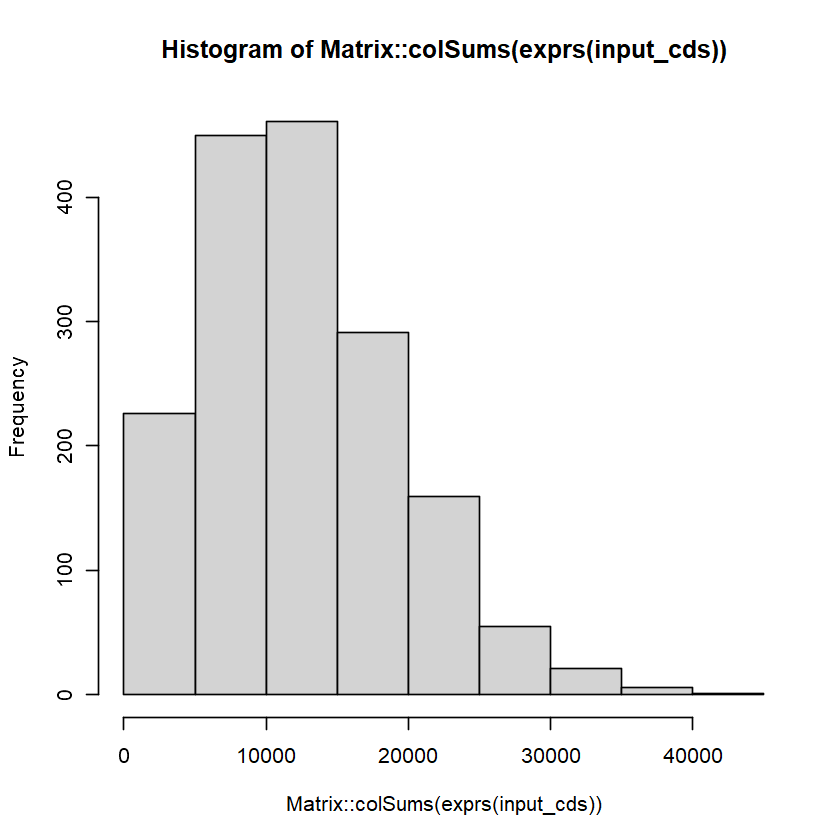

In [9]:
# Visualize peak_count_per_cell
hist(Matrix::colSums(exprs(input_cds)))

In [10]:
# Filter cells by peak_count
# Please set an appropriate threshold values according to your data 
max_count <-  15000
min_count <- 2000
input_cds <- input_cds[,Matrix::colSums(exprs(input_cds)) >= min_count] 
input_cds <- input_cds[,Matrix::colSums(exprs(input_cds)) <= max_count] 


# 4. Process Cicero-CDS object

In [11]:
# Data preprocessing
set.seed(2017)

input_cds <- detect_genes(input_cds)
input_cds <- estimate_size_factors(input_cds)
input_cds <- preprocess_cds(input_cds, method = "LSI")

# Dimensional reduction with umap
input_cds <- reduce_dimension(input_cds, reduction_method = 'UMAP', 
                              preprocess_method = "LSI")
umap_coords <- reducedDims(input_cds)$UMAP


cicero_cds <- make_cicero_cds(input_cds, reduced_coordinates = umap_coords)

# Save Cds object (Optional)
saveRDS(cicero_cds, "cicero_cds.Rds")



Overlap QC metrics:
Cells per bin: 50
Maximum shared cells bin-bin: 44
Mean shared cells bin-bin: 2.84387071851661
Median shared cells bin-bin: 0



ERROR: Error in eval(expr, envir, enclos): objeto 'output_folder' no encontrado


# 5. Load reference genome information

To run Cicero, you need to get a genomic coordinate file that contains the length of each chromosome.
You can download the mm10 genomic information with the following command.

If your scATAC-seq data was generated with a different reference genome, you will need to get the genome coordinates file for the reference genome you used. See the Cicero documentation for more information.

https://cole-trapnell-lab.github.io/cicero-release/docs_m3/#installing-cicero

In [13]:
# !!Please make sure that the reference genome information below matches your scATAC-seq reference genome.

# If your scATAC-seq was aligned to the mm10 reference genome, you can read the chromosome length file using the following command.
download.file(url = "https://raw.githubusercontent.com/morris-lab/CellOracle/master/docs/demo_data/mm10_chromosome_length.txt",
              destfile = "./mm10_chromosome_length.txt")
chromosome_length <- read.table("./mm10_chromosome_length.txt")

# For mm9 genome, you can use the following command.
#data("mouse.mm9.genome")
#chromosome_length <- mouse.mm9.genome

# For hg19 genome, you can use the following command.
#data("human.hg19.genome")
#chromosome_length <- mhuman.hg19.genome



# 6. Run Cicero

In [14]:
# Run the main function
conns <- run_cicero(cicero_cds, chromosome_length) # Takes a few minutes to run

# Save results (Optional)
#saveRDS(conns, "/cicero_connections.Rds")

# Check results
head(conns)

[1] "Starting Cicero"
[1] "Calculating distance_parameter value"
[1] "Running models"
[1] "Assembling connections"
[1] "Successful cicero models:  9311"
[1] "Other models: "

Zero or one element in range 
                        1650 
[1] "Models with errors:  0"
[1] "Done"


,Peak1,Peak2,coaccess
,<chr>,<fct>,<dbl>
1,chr10_100013963_100014429,chr10_99750232_99750406,0.001334807
2,chr10_100013963_100014429,chr10_99759642_99759789,0.000000000
3,chr10_100013963_100014429,chr10_99829469_99829829,0.000000000
4,chr10_100013963_100014429,chr10_99834942_99835260,0.000000000
5,chr10_100013963_100014429,chr10_99839536_99839644,0.019234538
6,chr10_100013963_100014429,chr10_99840217_99841136,0.119582621


In [16]:
saveRDS(conns, "cicero_Zhu_et_al_connections.Rds")

# 7. Save results for the next step

In [17]:
all_peaks <- row.names(exprs(input_cds))
write.csv(x = all_peaks, file = "all_peaks.csv")
write.csv(x = conns, file = "cicero_connections.csv")


**Please go to next step: TSS annotation**

https://morris-lab.github.io/CellOracle.documentation/tutorials/base_grn.html#step2-tss-annotation